## Model Training Explanation
This notebook is about training 1 Model A with RGB Images.

In [1]:
import matplotlib.pyplot as plt

In [8]:
from importlib import reload

import vpc_cnn_a
import vpc_data

reload(vpc_cnn_a)
reload(vpc_data)

<module 'vpc_data' from 'c:\\Universidade\\vpc\\VPC-TP\\src\\single_model_A_rgb\\vpc_data.py'>

In [3]:
X_train, y_train, X_val, y_val = vpc_data.load_training_data(validation_split=0.2)

Loading Training data from 43 directories
Training images loaded. Shuffling data.
X_train_gray.shape (31367, 30, 30, 3)
X_valid_gray.shape (7842, 30, 30, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [5]:
model_a_rgb = vpc_cnn_a.CNN_A_RGB("ModelARGB", img_size=30, channels=3)

Model: "ModelARGB"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 30, 3)]       0         
_________________________________________________________________
resizing (Resizing)          (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18

In [6]:
model_a_rgb.train( X_train, y_train, X_val, y_val, epochs=120, stop_early=True)

Epoch 1/120
981/981 [==============================] - 39s 31ms/step - loss: 0.3688 - accuracy: 0.9016 - val_loss: 0.2637 - val_accuracy: 0.9200

Epoch 00001: val_loss improved from inf to 0.26369, saving model to saved_models\ModelARGB
INFO:tensorflow:Assets written to: saved_models\ModelARGB\assets
Epoch 2/120
981/981 [==============================] - 25s 25ms/step - loss: 0.0580 - accuracy: 0.9835 - val_loss: 0.2391 - val_accuracy: 0.9332

Epoch 00002: val_loss improved from 0.26369 to 0.23907, saving model to saved_models\ModelARGB
INFO:tensorflow:Assets written to: saved_models\ModelARGB\assets
Epoch 3/120
981/981 [==============================] - 24s 24ms/step - loss: 0.0403 - accuracy: 0.9879 - val_loss: 0.0530 - val_accuracy: 0.9860

Epoch 00003: val_loss improved from 0.23907 to 0.05304, saving model to saved_models\ModelARGB
INFO:tensorflow:Assets written to: saved_models\ModelARGB\assets
Epoch 4/120
981/981 [==============================] - 24s 24ms/step - loss: 0.0335 - 

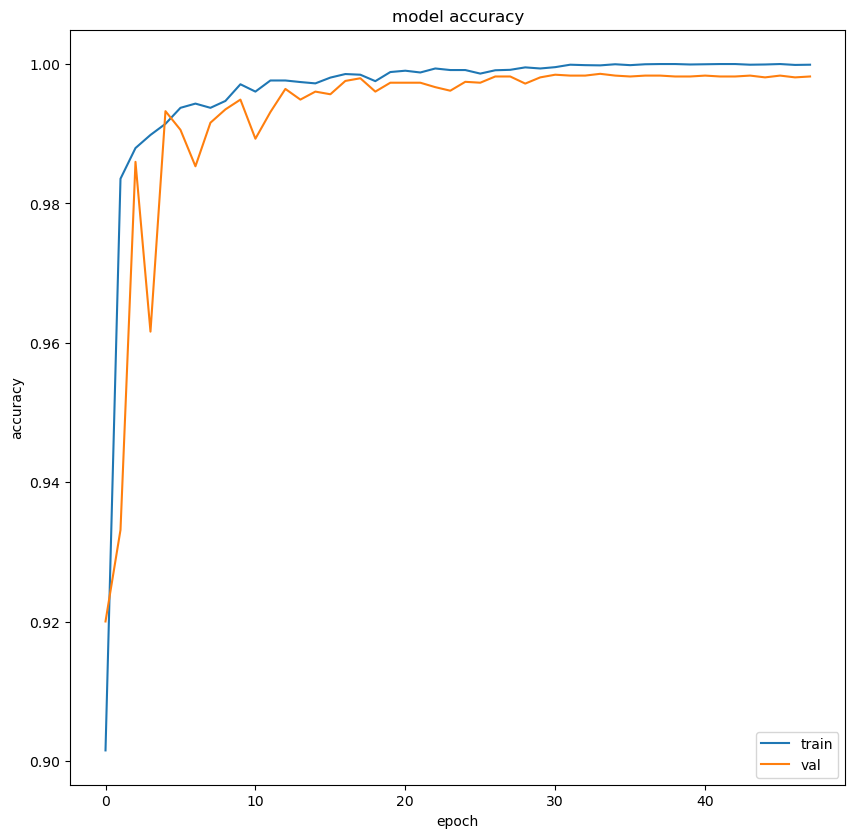

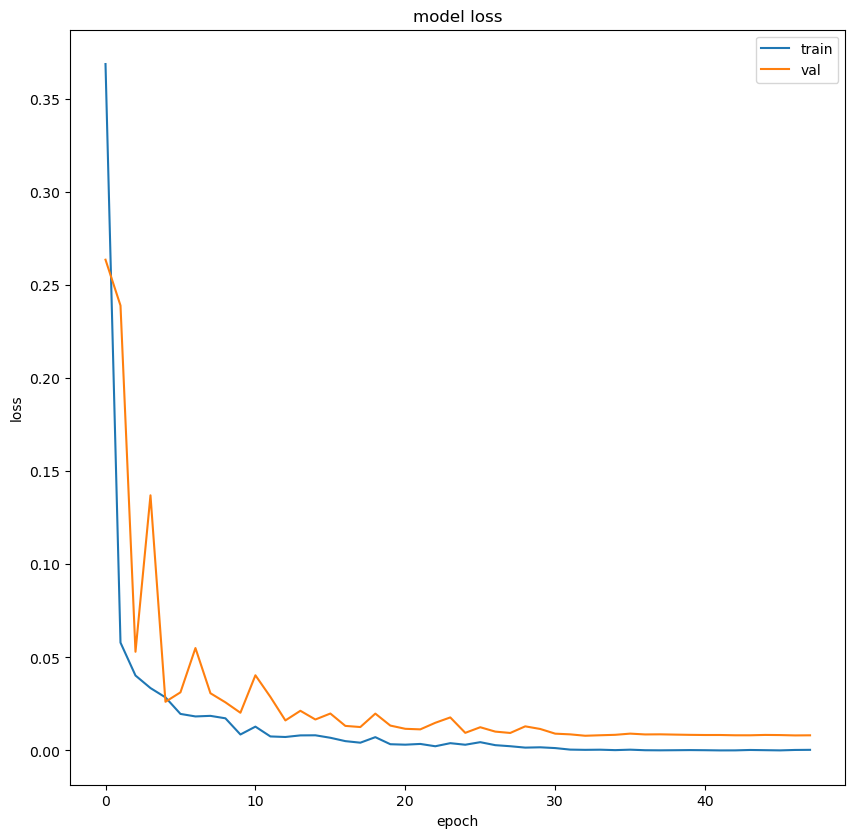

In [7]:
model_a_rgb.plot_history()

In [9]:
X_test, y_test = vpc_data.load_testing_data()

Loading testing data from 43 directories
Test images loaded.
test_gray data shape:  (12630, 30, 30, 3)
test_labels shape:  (12630,)


Test Data accuracy:  98.74901029295329
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      1.00       720
           2       1.00      1.00      1.00       750
           3       0.99      0.98      0.98       450
           4       1.00      1.00      1.00       660
           5       0.97      1.00      0.99       630
           6       0.99      0.94      0.97       150
           7       0.98      0.99      0.99       450
           8       0.99      0.98      0.99       450
           9       0.99      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.98      0.99      0.98       420
          12       1.00      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       1.00      1.00      1.0

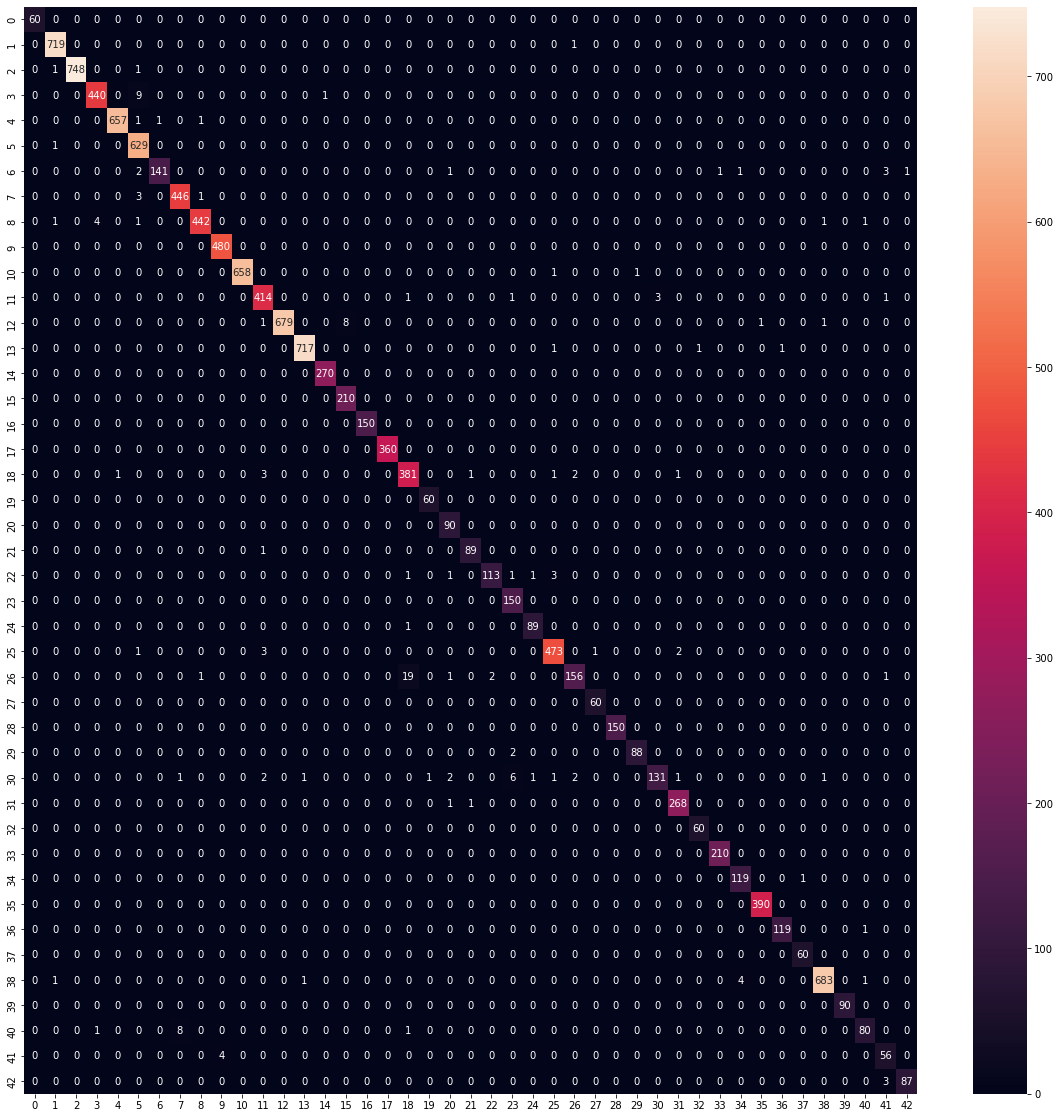

In [9]:
model_a_rgb.evaluate(X_test, y_test)

In [10]:
loaded_model_A_rgb =  vpc_cnn_a.CNN_A_RGB("ModelARGB", img_size=30, channels=3)

Model: "ModelARGB"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30, 30, 3)]       0         
_________________________________________________________________
resizing_1 (Resizing)        (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        112       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18

In [11]:
loaded_model_A_rgb.load()

In [12]:
loaded_model_A_rgb.evaluate_error(X_test, y_test)

Test Data error/loss:  0.0633985374258568
